In [1]:
from google.colab import files

uploaded = files.upload()

Saving userBilling.csv to userBilling.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv ('userBilling.csv')

In [4]:
print(df)

         userID  sum(b.amount)
0    USR_376325           5024
1    USR_617496           9819
2    USR_460490           3048
3    USR_928842          14602
4    USR_643581           5675
..          ...            ...
172  USR_958861           1920
173  USR_416141            128
174  USR_854674           1792
175  USR_704965            160
176  USR_381816             16

[177 rows x 2 columns]


In [5]:
x = df['sum(b.amount)'].iloc[:].values
x = np.array(x)
print(x)

[ 5024  9819  3048 14602  5675  6902 23624  8832  8986 28416 55401   928
 54656 14420  6400 60583   651  4352  3332  3952 10288 35328 16512 38400
 12568 29292 45125 31864 17408 13968 20816  4657  2480    53 56800 63616
 16269 88336  1732  8640 16696  2486  7168 11507 96864 37464  7152 26064
  1038 16048 43298 13968   725  9812 13824 17808  4210 21680  3648 12296
  1768 24512 16815   400 13517 18176 17728  3360  8966 14176 30524  9661
  6298 10923   640 18432 13307 61768  4176  1888  7767  6063 22429 25353
 38106 10701  3424   704 23549  7990  1992 14211  4123  6032  7872  8320
  6754  9216   480   693 30976 27264 12032 25600 51184 12672  3520 64512
 36352  2640  2880 15872 38271   412 36288 17298   887   214   512 51810
 17519  5152 43008   252 11061  5387 22400  7296  9472  1376 10528  1124
 12512   280 24576  2880   238  1920  5040  9536    65    25   576  9613
  5632   209 23040  5184 12898  3456   720  9237  1536   600  4608   320
 12941 28928 12288  1792 16560   576   190   384  6

In [21]:
kmeans = KMeans(n_clusters=3, init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x[:,].reshape(-1,1))
print(kmeans.cluster_centers_) #display cluster centers

[[ 5371.45081967]
 [24552.2195122 ]
 [59782.92857143]]


In [22]:
print(kmeans.labels_)

[0 0 0 0 0 0 1 0 0 1 2 0 2 0 0 2 0 0 0 0 0 1 1 1 0 1 2 1 1 0 1 0 0 0 2 2 1
 2 0 0 1 0 0 0 2 1 0 1 0 1 2 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 2 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 2 0 0 2 1 0 0
 1 1 0 1 1 0 0 0 2 1 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


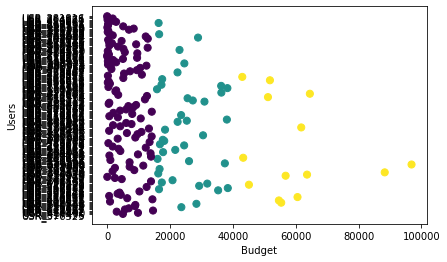

In [31]:
plt.scatter(df['sum(b.amount)'], df['userID'], c=y_kmeans, s=50, cmap='viridis');
plt.xlabel('Budget')
plt.ylabel('Users')
plt.savefig('example.png');

In [37]:
import pickle
pickle.dump(kmeans, open("model.pkl", "wb"))

In [40]:
model = pickle.load(open("model.pkl", "rb"))
budget = input('Enter budget')
xp = pd.DataFrame([budget])
x_dr = np.array(xp.iloc[:].values).reshape(1,-1)
print('It belongs to cluster number: {}'.format(model.predict(x_dr)))

Enter budget80000
It belongs to cluster number: [2]


[0]
